In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_classes=4,
    n_clusters_per_class=1,
    random_state=40,
)

df = pd.DataFrame(X, columns=['feature1', 'feature2'])
y = pd.Series(y)

### **Skill Check:** Plot the data using a scatter plot ( $feature1$ on the x-axis, $feature2$ on the y-axis )

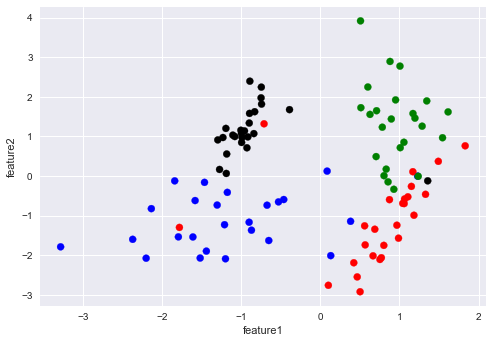

In [4]:
color_map = {0: 'blue', 1: 'red', 2: 'black', 3: 'green'}
colors = y.map(color_map)

# Note: the 's' keyword just changes the size of the dots
df.plot(kind='scatter', x='feature1', y='feature2', s=50, c=colors)

### Use the k-means algorithm to group the observations into clusters

In [5]:
estimator = KMeans(n_clusters=4)
estimator.fit(df)

labels = estimator.labels_

### Plot the data using a scatter plot again, this time using $labels$ to color code the points

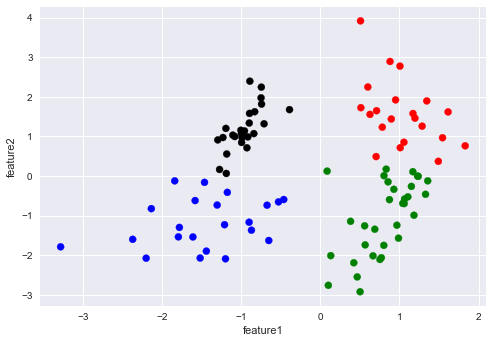

In [6]:
color_map = {0: 'blue', 1: 'red', 2: 'black', 3: 'green'}
colors = pd.Series(labels).map(color_map)

df.plot(kind='scatter', x='feature1', y='feature2', s=50, c=colors)

### What happens if you decrease or increase the number of clusters?

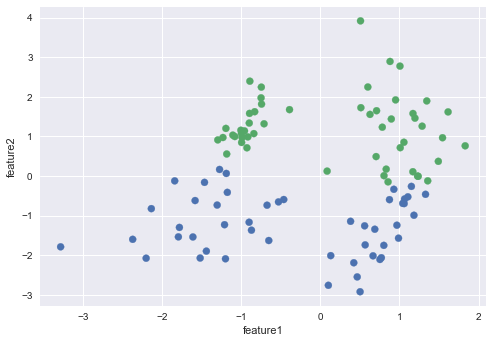

In [7]:
estimator = KMeans(n_clusters=2)
estimator.fit(df)

labels = estimator.labels_

palette = sns.color_palette(n_colors=25)
colors = pd.Series(labels).map(lambda x: palette[x])
df.plot(kind='scatter', x='feature1', y='feature2', s=50, c=colors)

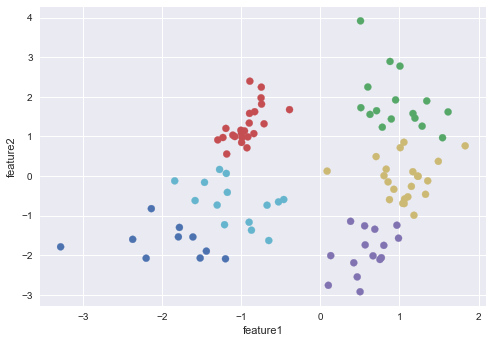

In [8]:
estimator = KMeans(n_clusters=6)
estimator.fit(df)

labels = estimator.labels_

palette = sns.color_palette(n_colors=25)
colors = pd.Series(labels).map(lambda x: palette[x])
df.plot(kind='scatter', x='feature1', y='feature2', s=50, c=colors)

### Calculate the Silhouette Coefficient for models with 2 clusters, 4 clusters and 6 clusters

In [118]:
labels = KMeans(n_clusters=2).fit(X).labels_
print '2 clusters:', metrics.silhouette_score(X, labels, metric='euclidean')

2 clusters: 0.394998690878


In [120]:
labels = KMeans(n_clusters=4).fit(X).labels_
print '4 clusters:', metrics.silhouette_score(X, labels, metric='euclidean')

4 clusters: 0.492248045976


In [122]:
labels = KMeans(n_clusters=6).fit(X).labels_
print '6 clusters:', metrics.silhouette_score(X, labels, metric='euclidean')

6 clusters: 0.506108719145


### We can create a line plot with n_clusters on the x-axis and sum of squared errors on the y-axis to find the optimal number of clusters (https://bl.ocks.org/rpgove/0060ff3b656618e9136b)

In [15]:
def gen_elbow_plot(min_clusters, max_clusters):
    n_clusters = []
    errors = []
    
    # For each k, let's calculate the sum of squared errors
    for k in range(min_clusters, max_clusters):
        
        # Run the model
        estimator = KMeans(n_clusters=k)
        estimator.fit(df)
        
        # Get the coordinates of the centroids and also get the labels
        clusters = estimator.cluster_centers_
        labels = estimator.labels_

        sse = 0
        
        # For each feature / dimension, calculate the mean squared error
        # between each point in the cluster and the cluster centroid
        for i, feature in enumerate(df.columns):
            y_pred = [clusters[label][i] for label in labels]
            y_true = df[feature]
            sse += metrics.mean_squared_error(y_pred, y_true)
        
        # Store the output for plotting
        n_clusters.append(k)
        errors.append(sse)
    
    plt.plot(n_clusters, errors)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Mean Squared Error')

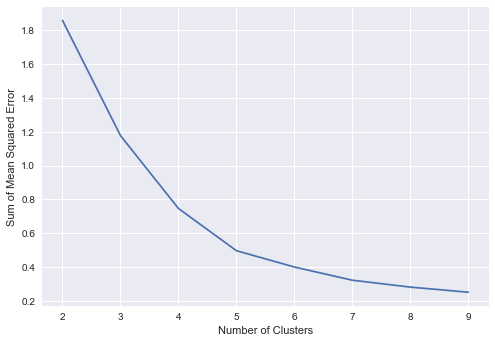

In [17]:
gen_elbow_plot(min_clusters=2, max_clusters=10)